# NHOM 4 - TT_XLA

## Chương 4: ĐẶC TRƯNG CỦA ẢNH VÀ BÀI TOÁN NHẬN DIỆN

> THÀNH VIÊN:
- Võ Minh Thuận    - 21161366
- Trần Thị Xuân Hy - 21161323
- Lê Quang Thương  - 21161367

### MỤC TIÊU 


Trong chương này, người học sẽ thảo luận về các đặc trưng của ảnh và áp dụng các đặc trưng cho bài toán nhận điện. Các đặc trưng được thảo luận trong chương này gồm có đặc trưng về cạnh, đặc trưng về góc. Bài toán nhận diện được thảo luận và bài toán nhận diện khuôn mặt. Cuối cùng, các khối rời sẽ được kết hợp với nhau để tạo thành một ứng dụng bảo vệ danh tính cá nhân trên mạng xã hội. Chi tiết các phần được liệt kê như sau:
- Đặc trưng về cạnh và ứng dụng
- Đặc trưng về góc và ứng dụng
- Phát hiện khuôn mặt
- Ứng dụng bảo vệ danh tính


### NHIỆM VỤ NGƯỜI HỌC

Thực hiện đầy đủ các câu hỏi trong phần này trước khi đến lớp:
- 1> Hãy trình bày kỹ thuật rút trích đặc trưng bằng bộ lọc Canny?
- 2> Hãy trình bày kỹ thuật rút trích đặc trưng phát hiện góc?
- 3> Hãy trình bày khái miện về đối tượng và lập trình hướng đối tượng?
- 4> Định nghĩa về bài toán phát hiện khuôn mặt?
- 5> Trình bày cách đọc một tập tin video hoặc kết nối với camera sử dụng thư viện OpenCV.


Import các thư viện cần thiết cho chapter 


In [18]:
from matplotlib import pyplot as plt
from matplotlib import patches
from skimage.feature import corner_harris, corner_peaks, Cascade, canny
from skimage import color, data
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.filters import gaussian
import cv2
import time
import numpy as np

khởi tạo hàm show_image với các thông số:
- image: là biến dùng để hiển thị. 
- title: là tiêu đề của biến.
- cmap_tyoe: là kiểu màu sắc của biến.
- chức năng của hàm này là sử dụng module Pyplot để hiển thị hình ảnh.

In [19]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [20]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("Original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

In [21]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

In [22]:
def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2
            )
        )
    plt.show()

Bài 4.1 Tìm cạnh với thuật toán Canny
- Câu hỏi: Trong bài tập này, xác định các hình dạng trong hình quả bưởi bằng cách phát hiện các cạnh, sử dụng thuật toán Canny.

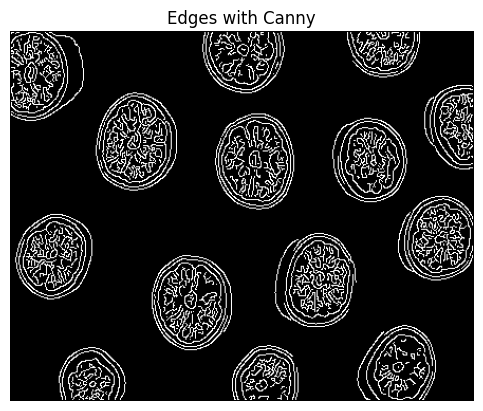

In [23]:
# Tải các thư viện cần thiết
from skimage.feature import canny
import cv2
# Đọc ảnh
image = cv2.imread("./imgs/img_bt_4.1_1.png")
#  chuyển đổi ảnh thành ảnh xám
grapefruit = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#  Áp dụng bộ lọc cạnh
canny_edges = canny(grapefruit)
#  Hiển thị kết quả
show_image(canny_edges, "Edges with Canny")

Bài tập 4.2: Khảo sát ảnh hưởng của việc lọc nhiễu lên bộ lọc phát hiện cạnh
- Câu hỏi: Hãy thực hiện lại yêu cầu của bài 1. Tuy nhiên hãy thêm phần xử lý lọc nhiễu trước khi phát hiện cạnh. Sử dụng bộ lọc Gaussian với các mức độ làm mờ khác nhau  để làm cho ảnh mượt mà hơn thông qua cách  điều khiển giá trị tham số sigma.


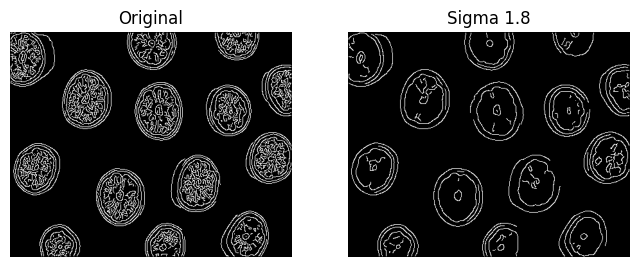

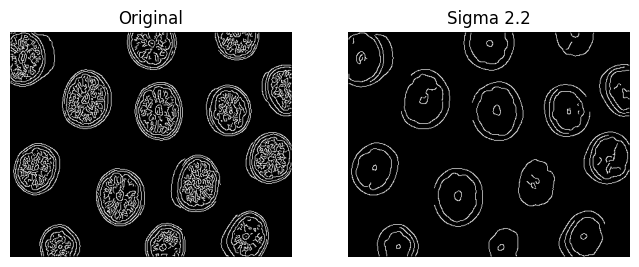

In [24]:
# Tải các thư viện cần thiết
from skimage.feature import canny
import cv2
# Đọc ảnh từ file thư viện cho sẵn
image = cv2.imread("./imgs/img_bt_4.1_1.png")
#  chuyển đổi ảnh thành ảnh xám
grapefruit = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#  Áp dụng bộ lọc cạnh
canny_edges = canny(grapefruit)
canny_edges_sigma_1_8 = canny(grapefruit, sigma=1.8)
canny_edges_sigma_2_2 = canny(grapefruit, sigma=2.2)
#  Hiển thị kết quả
plot_comparison(canny_edges, canny_edges_sigma_1_8, "Sigma 1.8")
plot_comparison(canny_edges, canny_edges_sigma_2_2, "Sigma 2.2")

Bài tập 4.3: Phát hiện góc bằng bộ lọc Harris
- Câu hỏi: Tìm các góc của tòa nhà sử dụng phát hiện góc Harris. Sử dụng các hàm show_image() và show_image_with_corners() đã được cho trước. Các hàm của thư viện color cũng được khai báo để chuyển ảnh sang ảnh xám.


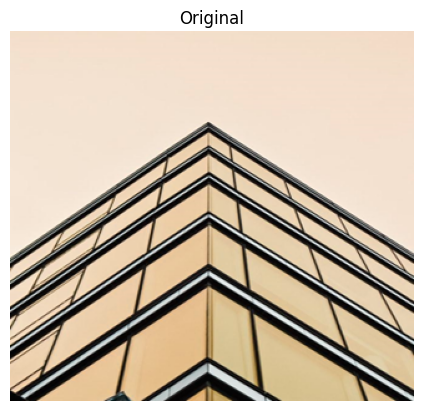

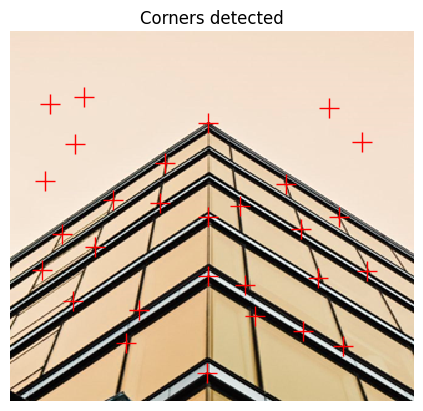

In [25]:
#  Khai báo các thư viện cần thiết
from skimage.feature import corner_harris, corner_peaks
import cv2
# Đọc ảnh từ file thư viện cho sẵn:
building_image = cv2.imread("./imgs/img_bt_4.3_1.png")
#  Chuyển đổi ảnh màu sang ảnh xám
building_image_gray = cv2.cvtColor(building_image, cv2.COLOR_BGR2GRAY)
# Ứng dụng bộ lọc Harris để xác định các góc có khả năng:
measure_image = corner_harris(building_image_gray,method='esp',k=0.2,eps=0.01,sigma=1.2)
# Tìm đỉnh của các góc dựa trên đáp ứng của bộ lọc Harris
coords = corner_peaks(measure_image, min_distance=20)
#  Hiển thị kết quả và so sánh
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

Bài tập 4.4: Khảo sát ảnh hưởng của tham số min_distance trong việc phát hiện góc
- Câu hỏi: Trong bài tập này, hãy khảo sát ảnh hưởng của tham số điều khiển min_distance của hàm corner_peaks() trong việc phát hiện các góc đối tượng trong của ảnh. Các hàm show_image(), show_image_with_corners() và các thư viện bắt buộc đã được khai báo trước trước cho bài tập này.


In [26]:
# Thay đổi tham số điều khiển min_distance và quan sát số lượng các góc có thể tìm được
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total",
      len(coords_w_min_2), "corners in the image.")
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance set to 40, we detect a total",
      len(coords_w_min_40), "corners in the image.")

With a min_distance set to 2, we detect a total 897 corners in the image.
With a min_distance set to 40, we detect a total 7 corners in the image.


Bài tập 4.5: Nhận diện khuôn mặt
- Câu hỏi: Kiểm tra xem có một người hiện diện hay không trong ảnh được chụp vào ban đêm.

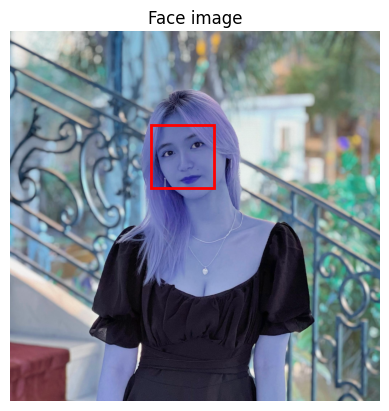

In [27]:
from skimage import data
from skimage.feature import Cascade
night_image = cv2.imread("./imgs/img_bt_4.5_3.png")
# img = data.astronaut()
# night_image = img
#  Tải mô hình đã được huấn luyện sẵn
trained_file = data.lbp_frontal_face_cascade_filename()
#  khởi tạo đối tượng phát hiện khuôn mặt
detector = Cascade(trained_file)
#  Thay đổi các tham số điều khiển giá trị lớn nhất và giá trị nhỏ nhất của khuôn mặt và đánh giá sự thay đổi
detected = detector.detect_multi_scale(img=night_image,
                                       scale_factor=1.2, step_ratio=1, min_size=(125,125), max_size=(500,500))
#  Hiển thị kết quả.
show_detected_face(night_image, detected)

Bài tập 4.6: Nhận dạng nhiều khuôn mặt
- Câu hỏi: Trong bài tập này, hãy phát hiện nhiều khuôn mặt trong một ảnh và hiển thị chúng riêng lẻ.

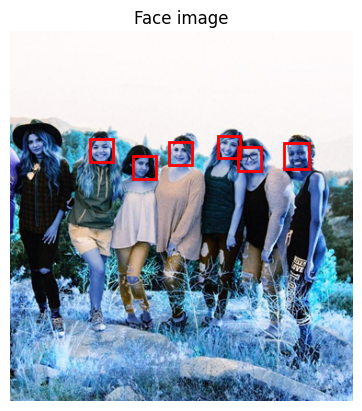

In [28]:
from skimage import data
from skimage.feature import Cascade
friends_image = cv2.imread("./imgs/img_bt_4.6_1.png")
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()
# Initialize the detector cascade
detector = Cascade(trained_file)
# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image, scale_factor=1.2,
                         step_ratio=1, min_size=(10, 10), max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

Bài tập 4.7: Phân đoạn và phát hiện khuôn mặt
- Câu hỏi: Hãy thực hiện phân đoạn khuôn mặt bằng kỹ thuật siêu điểm ảnh. Sau đó dùng những siêu điểm ảnh này để thực thi bài toán phát hiện khuôn mặt. Hãy đánh giá kết quả thực thi và thời gian thực thi để so sánh đóng góp của kỹ thuật siêu điểm ảnh vào bài toán phát hiện khuôn mặt.


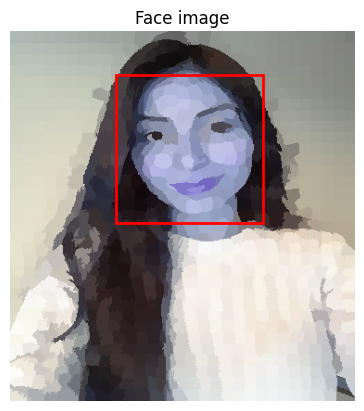

In [29]:
image_persion = cv2.imread("./imgs/img_bt_4.7_1.png")
# Tách ảnh gốc thành 100 vùng
segments = slic(image_persion, n_segments=1000)
#  Tạo ra ảnh phân đoạn bằng hàm  label2rgb
segmented_image = label2rgb(segments, image_persion, kind='avg')
#  Phát hiện khuôn mặt dựa vào ảnh phân đoạn
detected = detector.detect_multi_scale(img=segmented_image, scale_factor=1.2,
                         step_ratio=1, min_size=(10, 10), max_size=(1000, 1000))
# Hiển thị kết quả và so sánh
show_detected_face(segmented_image, detected)

Bài tập 4.8: Bảo vệ quyền riêng tư
- Câu hỏi: Trong bài tập này, ta sẽ phát hiện khuôn mặt trong ảnh và vì quyền riêng tư, sẽ ẩn dữ liệu bằng cách tự động làm mờ khuôn mặt của người trong ảnh. Có thể sử dụng bộ lọc Gaussian để làm mờ. Bộ nhận dạng khuôn mặt đã được khai báo sẵn với tên biến detector và tất cả các thư viện cần thiết đã được báo.


In [30]:
def getFaceRectangle(image, d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']

    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']

    # Extract the detected face
    face = image[x:width, y:height]
    return face

In [31]:
def mergeBlurryFace(original, gaussian_image):
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']

    original[x:width, y:height] = gaussian_image
    return original

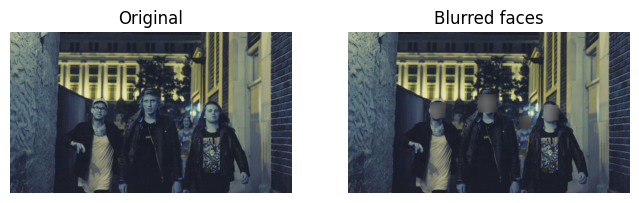

In [37]:
from skimage.filters import gaussian

group_image = cv2.imread("./imgs/img_bt_4.8_1.png")
group_image_o = group_image.copy()

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(25, 25), max_size=(80, 80))

# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(group_image, d)

    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, sigma=8, preserve_range=True)

    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)

plot_comparison(group_image_o, resulting_image, 'Blurred faces')

Bài tập 4.9:  Trong bài tập này, hãy phục hồi một bức ảnh bị hư hỏng rất nặng. Bức ảnh này đã bị làm hỏng do nhiễu, biến dạng và thiếu thông tin do dữ liệu bị lỗi. 

In [38]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

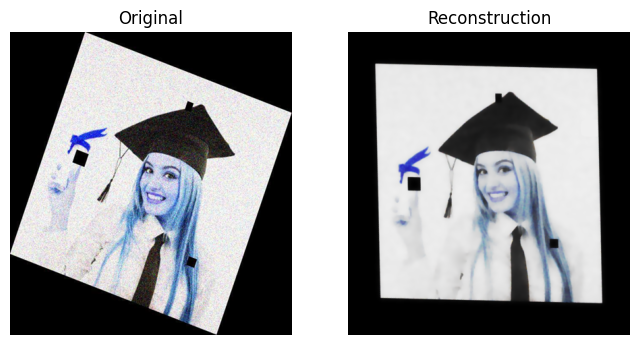

In [48]:
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

damaged_image = cv2.imread("./imgs/img_bt_4.9_1.png")

# Transform the image so it's not rotate
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(
    upright_img, weight=0.1)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(
    upright_img_without_noise, mask, channel_axis=-1)

# Show the resulting image
plot_comparison(damaged_image, result, "Reconstruction")

### CÂU HỎI KIỂM TRA ĐÁNH GIÁ


Câu 4.1: Trong lệnh skimage.feature.canny(), các tham số high_threshold đóng vai trò gì? Hãy viết một đoạn mã để chứng minh kết luận vừa nêu.


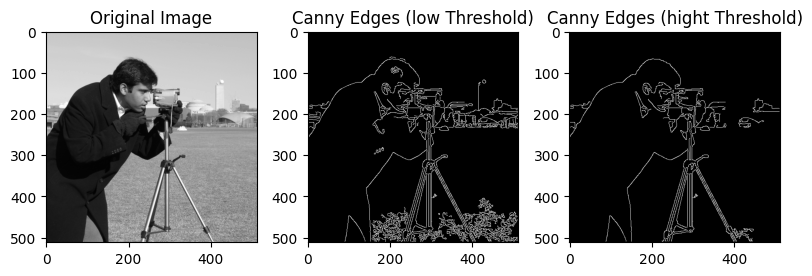

In [54]:
import matplotlib.pyplot as plt
from skimage import data, feature
image = data.camera()
edges_low_high_threshold = feature.canny(image, high_threshold=100)
edges_hight_high_threshold = feature.canny(image, high_threshold=200)
plt.figure(figsize=(8, 3))
plt.subplot(131)
plt.imshow(image, cmap=plt.cm.gray)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(edges_low_high_threshold, cmap=plt.cm.gray)
plt.title("Canny Edges (low Threshold)")
plt.subplot(133)
plt.imshow(edges_hight_high_threshold, cmap=plt.cm.gray)
plt.title("Canny Edges (hight Threshold)")
plt.tight_layout()
plt.show()

Câu 4.2: Trong lệnh skimage.feature.corner_harris(), tham số k đóng vai trò gì? Hãy viết một đoạn mã để chứng minh kết luận vừa nêu.


Câu 4.3: Tham số threshold_rel, min_distance của lệnh skimage.feature.corner_peaks() có tác dụng gì? Hãy viết một đoạn mã để chứng minh kết luận vừa nêu.


Câu 4.4: Tham số window_width, window_height của lệnh skimage.feature.Cascade() có tác dụng gì? Hãy viết một đoạn mã để chứng minh kết luận vừa nêu.


Câu 4.5: Hãy sử dụng điện thoại quay video các bạn trong lớp, sau đó thực hiện phát hiện khuôn mặt trong video